# SVC iris multi
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비

In [2]:
X_train, X_test, y_train, y_test = my.get_iris(mode='bin')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

## 정규화
- 표준화 (StandardScaler)
- 최소-최대 정규화 (MinMaxScaler)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
#X_train_s[:5]

In [4]:
y_train_s = y_train.values

## 학습

In [5]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=2022)
svc.fit(X_train_s, y_train_s)

SVC(kernel='linear', random_state=2022)

In [6]:
svc.score(X_train_s, y_train_s)

1.0

In [7]:
svc.coef_
# 기울기의 값

array([[ 0.61113305, -0.81845101,  1.75675951,  1.3825968 ]])

In [8]:
svc.intercept_
# shape

array([-1.22672043])

## 최종

In [9]:
X_test_s = scaler.transform(X_test)
y_test_s = y_test.values

In [10]:
svc.score(X_test_s, y_test_s)

1.0

## 예측

In [11]:
y_pred = svc.predict(X_test_s)

In [12]:
my.print_score(y_test_s, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


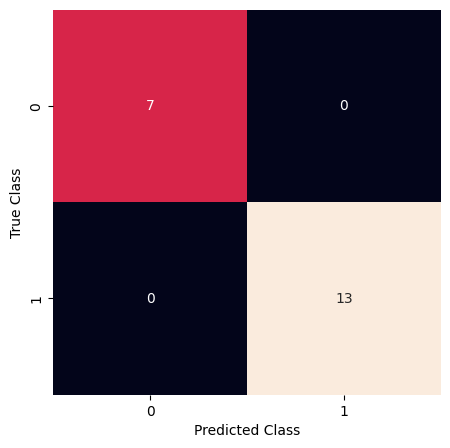

In [13]:
my.plot_confusion_matrix(y_test_s, y_pred)

---
# 다중분류

In [14]:
X_train, X_test, y_train, y_test = my.get_iris()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_train_s = y_train.values
y_test_s = y_test.values

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=2022)
svc.fit(X_train_s, y_train_s)

SVC(kernel='linear', random_state=2022)

In [20]:
svc.score(X_train_s, y_train_s)

0.9666666666666667

In [33]:
print("coef:", svc.coef_)
print("intercept:", svc.intercept_)

coef: [[-0.53055058  1.33970031 -2.11749153 -1.93817589]
 [-0.4691355   0.51529246 -1.58409657 -1.48656971]
 [-0.54963312  0.75497453 -2.66627722 -3.85961393]]
intercept: [0.76496595 1.17046034 4.52990526]


In [23]:
svc.score(X_test_s, y_test_s)

0.9666666666666667

In [28]:
y_pred = svc.predict(X_test_s)

In [31]:
my.print_score(y_test_s, y_pred, average='macro')

accuracy: 0.9666666666666667
precision: 0.9629629629629629
recall: 0.9743589743589745


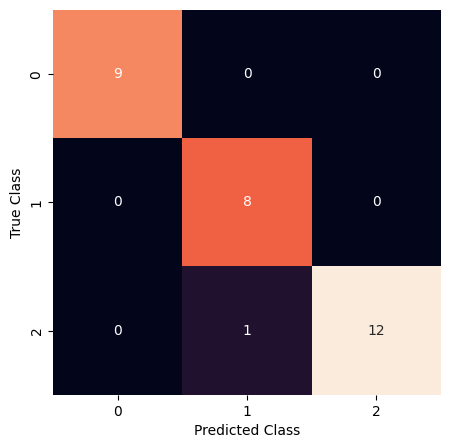

In [30]:
my.plot_confusion_matrix(y_test_s, y_pred)

## 다중모델 찾기

In [34]:
X_train, X_test, y_train, y_test = my.get_iris()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [36]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_train_s = y_train.values
y_test_s = y_test.values

### 모델 준비

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

names = ['linear', 'linearSVC', 'poly', 'rbf', 'knn-5', 'knn-9']

models = [
    SVC(kernel='linear', C=1),
    LinearSVC(C=1, max_iter=1000),
    # 결과는 비슷
    
    SVC(kernel='poly', degree=3),
    # 다항식을 씀. 차원(degree)는 3차원으로 설정
    SVC(kernel='rbf', C=1, gamma=0.7),
    
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=9)
]

scores = {}

for name, model in zip(names, models):
    model.fit(X_train_s, y_train_s)
    s = model.score(X_train_s, y_train_s)
    print(name, s)
    scores[name] = s

linear 0.9666666666666667
linearSVC 0.95
poly 0.9833333333333333
rbf 0.9666666666666667
knn-5 0.9583333333333334
knn-9 0.9666666666666667


C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

<BarContainer object of 6 artists>

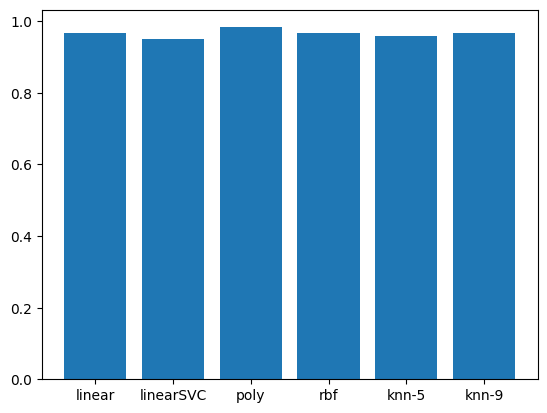

In [60]:
plt.bar(names,scores.values())

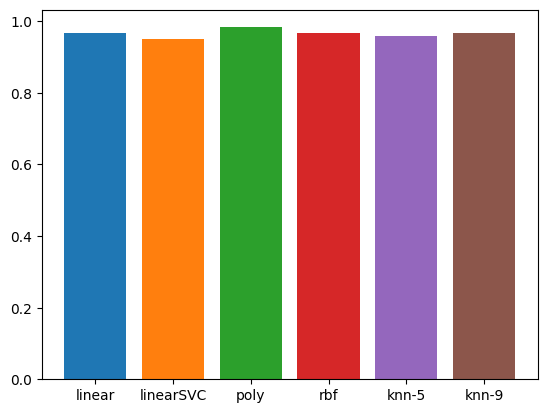

In [61]:
for name, model in zip(names, scores.values()):
    plt.bar(name,model)

# GridSearch

In [63]:
type(X_train_s), type(y_train_s)

(numpy.ndarray, numpy.ndarray)

In [67]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

params = [
    {   # key는 parameter 이름과 같아야 함
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        'C' : param_range,
        'degree' : [2,3],
        'kernel' : ['poly']
    }
]

In [71]:
from sklearn.model_selection import GridSearchCV
# Cross Validation ( 데이터 분할 후 검증 데이터 돌려쓰기 )

clf = SVC(random_state=2022)
gs = GridSearchCV(estimator=clf,
                    param_grid=params,
                    scoring ='accuracy', 
                    cv=3,
                    n_jobs=-1,
                    verbose=3
                 )
gs.fit(X_train_s, y_train_s)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [73]:
gs.best_estimator_

SVC(C=10, gamma=1, random_state=2022)

In [75]:
gs.best_score_

0.9833333333333334

In [77]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [83]:
# best_estimator_가 바로 학습된 상태임

clf = gs.best_estimator_
clf.fit(X_train_s, y_train_s)
clf.score(X_train_s, y_train_s)

0.975

### 재학습 
(시켜도되고 아니어도 되고)

In [81]:
clf = SVC(C=10, gamma=1, kernel='rbf', random_state=2022)
clf.fit(X_train_s, y_train_s)

SVC(C=10, gamma=1, random_state=2022)

In [82]:
clf.score(X_train_s, y_train_s)

0.975

In [84]:
clf.score(X_test_s, y_test_s)

0.9333333333333333

## RandomizedSearchCV

In [144]:
from sklearn.model_selection import RandomizedSearchCV


param_range = np.arange(0.001, 1000, 0.5)

params = [
    {   # key는 parameter 이름과 같아야 함
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        'C' : param_range,
        'degree' : [2,3],
        'kernel' : ['poly']
    }
]

# param_distributions,  n_iter 설정 필요
clf = SVC(random_state=2022)
rancv = RandomizedSearchCV(estimator = clf,
                           param_distributions = params,
                           scoring ='accuracy',
                           cv=3,
                           n_jobs=-1,
                           # verbose=3,
                           #n_iter=10
                          )
rancv.fit(X_train_s, y_train_s)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'gamma': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'kernel': ['rbf']},
                                        {'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'kernel': ['linear']},
                                        {'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'degree': [2, 3],
                                         'kernel': ['poly']}],
                   scoring='accuracy')

In [145]:
gs.best_estimator_

SVC(C=10, gamma=1, random_state=2022)

In [146]:
gs.best_score_

0.9833333333333334

In [147]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [148]:
# best_estimator_가 바로 학습된 상태임

clf = gs.best_estimator_
clf.fit(X_train_s, y_train_s)
clf.score(X_train_s, y_train_s)

0.975

In [149]:
clf = SVC(C=10, gamma=1, kernel='rbf', random_state=2022)
clf.fit(X_train_s, y_train_s)

SVC(C=10, gamma=1, random_state=2022)

In [150]:
clf.score(X_train_s, y_train_s)

0.975

In [151]:
clf.score(X_test_s, y_test_s)

0.9333333333333333